In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option("display.max_columns", None)

In [6]:
df = pd.read_csv("df3.csv")

In [7]:
fa = pd.read_csv("fa.csv")

In [9]:
fa

,Unnamed: 0,Weight_class,Date,Fighter,Opponent
0,0,Middleweight,2025-07-26,Robert Whittaker,Reinier de Ridder
1,1,Welterweight,2025-07-26,Muslim Salikhov,Carlos Leal
2,2,Bantamweight,2025-07-26,Said Nurmagomedov,Bryce Mitchell
3,3,Welterweight,2025-07-26,Carlos Leal,Muslim Salikhov
4,4,Bantamweight,2025-07-26,Petr Yan,Marcus McGhee
...,...,...,...,...,...
14059,15828,Flyweight,2014-06-14,Demetrious Johnson,Ali Bagautinov
14060,15829,Flyweight,2016-06-18,Geane Herrera,Ali Bagautinov
14061,15832,Bantamweight,2025-03-15,Carlos Vera,Josias Musasa
14062,15834,Middleweight,2015-11-07,Dan Henderson,Vitor Belfort


In [12]:
df = pd.merge(left = df, right = fa, on = ["Date", "Fighter", "Opponent"], how = "inner")
df

,Unnamed: 0.1,Unnamed: 0_x,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner_x,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Losses_Before_Fight,Weight_class_x,Method,Round,Opp_KD_Absorbed,Opp_STR_Absorbed,Opp_SUB_Faced,Opp_Is_Winner,Opp_Days_Since_Last_Fight,Opp_Prev_KD_Absorbed,Opp_Prev_STR_Absorbed,Opp_Prev_SUB_Faced,Opp_Past_3_KD_Absorbed,Opp_Past_3_STR_Absorbed,Opp_Past_3_SUB_Faced,Opp_UFC_Debut,Opp_Won_Last_Fight,Opp_Prev_3_Fight_Win_Rate,Opp_Wins_Before_Fight,Opp_Losses_Before_Fight,Fighter_Wins_By_KO,Fighter_Wins_By_SUB,Fighter_Wins_By_DEC,Fighter_Loss_By_KO,Fighter_Loss_By_SUB,Fighter_Loss_By_DEC,Opponent_Wins_By_KO,Opponent_Wins_By_SUB,Opponent_Wins_By_DEC,Opponent_Loss_By_KO,Opponent_Loss_By_SUB,Opponent_Loss_By_DEC,Total_Fights_Before,Opp_Total_Fights_Before,Fighter_Wins_By_KO_%,Opponent_Wins_By_KO_%,Fighter_Wins_By_SUB_%,Opponent_Wins_By_SUB_%,Fighter_Wins_By_DEC_%,Opponent_Wins_By_DEC_%,Fighter_Loss_By_KO_%,Opponent_Loss_By_KO_%,Fighter_Loss_By_SUB_%,Opponent_Loss_By_SUB_%,Fighter_Loss_By_DEC_%,Opponent_Loss_By_DEC_%,Fighter_Current_Win_Streak,Opponent_Current_Win_Streak,Name_x,Nickname_x,Name_y,Nickname_y,Weight_class_lbs,SLpM:_x,Str. Acc.:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ht._x,Reach_x,SLpM:_y,Str. Acc.:_y,SApM:_y,Str. Def:_y,TD Avg.:_y,TD Acc.:_y,TD Def.:_y,Sub. Avg.:_y,Ht._y,Reach_y,Closed_Stance,Matchup_ID,Fighter_Prev_3_Missing,Opp_Prev_3_Missing,Prev_KD_Absorbed_Ratio,Past_3_KD_Absorbed_Ratio,Past_3_SUB_Faced_Ratio,Prev_SUB_Faced_Ratio,Fighter_Overall_Win_%,Opponent_Overall_Win_%,Prev_KD_Absorbed_Diff,Prev_STR_Absorbed_Diff,Prev_SUB_Faced_Diff,Past_3_KD_Absorbed_Diff,Past_3_STR_Absorbed_Diff,Past_3_SUB_Faced_Diff,Days_Since_Last_Fight_Diff,Won_Last_Fight_Diff,Prev_3_Fight_Win_Rate_Diff,Wins_Before_Fight_Diff,Losses_Before_Fight_Diff,Wins_By_KO_Diff,Wins_By_SUB_Diff,Wins_By_DEC_Diff,Loss_By_KO_Diff,Loss_By_SUB_Diff,Loss_By_DEC_Diff,Wins_By_KO_%_Diff,Wins_By_SUB_%_Diff,Wins_By_DEC_%_Diff,Loss_By_KO_%_Diff,Loss_By_SUB_%_Diff,Loss_By_DEC_%_Diff,Current_Win_Streak_Diff,Overall_Win_%_Diff,SLpM:_Diff,Str. Acc.:_Diff,SApM:_Diff,Str. Def:_Diff,TD Avg.:_Diff,TD Acc.:_Diff,TD Def.:_Diff,Sub. Avg.:_Diff,Ht._Diff,Reach_Diff,Prev_3_Stats_Missing,SLpM:_Ratio,Str. Acc.:_Ratio,SApM:_Ratio,Str. Def:_Ratio,TD Avg.:_Ratio,TD Acc.:_Ratio,TD Def.:_Ratio,Sub. Avg.:_Ratio,Ht._Ratio,Reach_Ratio,Overall_Win_%_Ratio,Wins_By_KO_%_Ratio,Wins_By_SUB_%_Ratio,Wins_By_DEC_%_Ratio,Loss_By_KO_%_Ratio,Loss_By_SUB_%_Ratio,Loss_By_DEC_%_Ratio,Current_Win_Streak_Ratio,Days_Since_Last_Fight_Ratio,Unnamed: 0_y,Weight_class_y
0,0,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,273.0,0.0,3.0,1.0,0.000000,25.000000,0.333333,False,0.0,0.666667,17.0,6.0,Middleweight,DEC,5,1.0,66.0,0.0,True,84,0.0,8.0,0.0,0.000000,16.333333,0.000000,False,True,1.000000,3,0,6.0,0.0,11.0,3.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,23,3,0.352941,0.333333,0.000000,0.666667,0.647059,0.000000,0.500000,0.00,0.166667,0.0,0.333333,0.00,0,3,Robert Whittaker,The Reaper,Reinier de Ridder,RdR,185 lbs.,4.54,0.43,3.41,0.59,0.80,0.38,0.81,0.0,72.0,73.0,3.25,0.60,2.21,0.44,4.74,0.38,0.66,1.4,76.0,78.0,False,"(Timestamp('2025-07-26 00:00:00'), ('Reinier d...",False,False,0.5,1.000000,1.333333,2.000000,0.739130,1.000000,0.0,-5.0,1.0,0.000000,8.666667,0.333333,189.0,-1.0,-0.333333,14.0,6.0,5.0,-2.0,11.0,3.0,1.0,2.0,0.019608,-0.666667,0.647059,0.500000,0.166667,0.333333,-3,-0.260870,1.29,-0.17,1.20,0.15,-3.94,0.00,0.15,-1.4,-4.0,-5.0,False,1.303529,0.893750,1.373832,1.104167,0.313589,1.000000,1.090361,0.416667,0.948052,0.936709,0.869565,1.014706,0.600000,1.647059,1.500000,1.166667,1.333333,0.25,3.223529,0,Middleweight
1,12,13,2025-07-26,Davey Grant,Da'Mon Blackshear,0.0,33.0,1.0,True,224.0,0.0,69.0,0.0,0.000000,53.000000,0.000000,False,1.0,0.666667,7.0,6.0,Bantamweight,DEC,3,0.0,66.0

In [13]:
df["UFC_Debut"]

0        False
1        False
2        False
3        False
4        False
         ...  
10689    False
10690    False
10691    False
10692    False
10693    False
Name: UFC_Debut, Length: 10694, dtype: bool

In [15]:
df #We want 3 groups, "Striker", "Grappler", "Well Rounded"

,Unnamed: 0.1,Unnamed: 0_x,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner_x,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Losses_Before_Fight,Weight_class_x,Method,Round,Opp_KD_Absorbed,Opp_STR_Absorbed,Opp_SUB_Faced,Opp_Is_Winner,Opp_Days_Since_Last_Fight,Opp_Prev_KD_Absorbed,Opp_Prev_STR_Absorbed,Opp_Prev_SUB_Faced,Opp_Past_3_KD_Absorbed,Opp_Past_3_STR_Absorbed,Opp_Past_3_SUB_Faced,Opp_UFC_Debut,Opp_Won_Last_Fight,Opp_Prev_3_Fight_Win_Rate,Opp_Wins_Before_Fight,Opp_Losses_Before_Fight,Fighter_Wins_By_KO,Fighter_Wins_By_SUB,Fighter_Wins_By_DEC,Fighter_Loss_By_KO,Fighter_Loss_By_SUB,Fighter_Loss_By_DEC,Opponent_Wins_By_KO,Opponent_Wins_By_SUB,Opponent_Wins_By_DEC,Opponent_Loss_By_KO,Opponent_Loss_By_SUB,Opponent_Loss_By_DEC,Total_Fights_Before,Opp_Total_Fights_Before,Fighter_Wins_By_KO_%,Opponent_Wins_By_KO_%,Fighter_Wins_By_SUB_%,Opponent_Wins_By_SUB_%,Fighter_Wins_By_DEC_%,Opponent_Wins_By_DEC_%,Fighter_Loss_By_KO_%,Opponent_Loss_By_KO_%,Fighter_Loss_By_SUB_%,Opponent_Loss_By_SUB_%,Fighter_Loss_By_DEC_%,Opponent_Loss_By_DEC_%,Fighter_Current_Win_Streak,Opponent_Current_Win_Streak,Name_x,Nickname_x,Name_y,Nickname_y,Weight_class_lbs,SLpM:_x,Str. Acc.:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ht._x,Reach_x,SLpM:_y,Str. Acc.:_y,SApM:_y,Str. Def:_y,TD Avg.:_y,TD Acc.:_y,TD Def.:_y,Sub. Avg.:_y,Ht._y,Reach_y,Closed_Stance,Matchup_ID,Fighter_Prev_3_Missing,Opp_Prev_3_Missing,Prev_KD_Absorbed_Ratio,Past_3_KD_Absorbed_Ratio,Past_3_SUB_Faced_Ratio,Prev_SUB_Faced_Ratio,Fighter_Overall_Win_%,Opponent_Overall_Win_%,Prev_KD_Absorbed_Diff,Prev_STR_Absorbed_Diff,Prev_SUB_Faced_Diff,Past_3_KD_Absorbed_Diff,Past_3_STR_Absorbed_Diff,Past_3_SUB_Faced_Diff,Days_Since_Last_Fight_Diff,Won_Last_Fight_Diff,Prev_3_Fight_Win_Rate_Diff,Wins_Before_Fight_Diff,Losses_Before_Fight_Diff,Wins_By_KO_Diff,Wins_By_SUB_Diff,Wins_By_DEC_Diff,Loss_By_KO_Diff,Loss_By_SUB_Diff,Loss_By_DEC_Diff,Wins_By_KO_%_Diff,Wins_By_SUB_%_Diff,Wins_By_DEC_%_Diff,Loss_By_KO_%_Diff,Loss_By_SUB_%_Diff,Loss_By_DEC_%_Diff,Current_Win_Streak_Diff,Overall_Win_%_Diff,SLpM:_Diff,Str. Acc.:_Diff,SApM:_Diff,Str. Def:_Diff,TD Avg.:_Diff,TD Acc.:_Diff,TD Def.:_Diff,Sub. Avg.:_Diff,Ht._Diff,Reach_Diff,Prev_3_Stats_Missing,SLpM:_Ratio,Str. Acc.:_Ratio,SApM:_Ratio,Str. Def:_Ratio,TD Avg.:_Ratio,TD Acc.:_Ratio,TD Def.:_Ratio,Sub. Avg.:_Ratio,Ht._Ratio,Reach_Ratio,Overall_Win_%_Ratio,Wins_By_KO_%_Ratio,Wins_By_SUB_%_Ratio,Wins_By_DEC_%_Ratio,Loss_By_KO_%_Ratio,Loss_By_SUB_%_Ratio,Loss_By_DEC_%_Ratio,Current_Win_Streak_Ratio,Days_Since_Last_Fight_Ratio,Unnamed: 0_y,Weight_class_y
0,0,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,273.0,0.0,3.0,1.0,0.000000,25.000000,0.333333,False,0.0,0.666667,17.0,6.0,Middleweight,DEC,5,1.0,66.0,0.0,True,84,0.0,8.0,0.0,0.000000,16.333333,0.000000,False,True,1.000000,3,0,6.0,0.0,11.0,3.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,23,3,0.352941,0.333333,0.000000,0.666667,0.647059,0.000000,0.500000,0.00,0.166667,0.0,0.333333,0.00,0,3,Robert Whittaker,The Reaper,Reinier de Ridder,RdR,185 lbs.,4.54,0.43,3.41,0.59,0.80,0.38,0.81,0.0,72.0,73.0,3.25,0.60,2.21,0.44,4.74,0.38,0.66,1.4,76.0,78.0,False,"(Timestamp('2025-07-26 00:00:00'), ('Reinier d...",False,False,0.5,1.000000,1.333333,2.000000,0.739130,1.000000,0.0,-5.0,1.0,0.000000,8.666667,0.333333,189.0,-1.0,-0.333333,14.0,6.0,5.0,-2.0,11.0,3.0,1.0,2.0,0.019608,-0.666667,0.647059,0.500000,0.166667,0.333333,-3,-0.260870,1.29,-0.17,1.20,0.15,-3.94,0.00,0.15,-1.4,-4.0,-5.0,False,1.303529,0.893750,1.373832,1.104167,0.313589,1.000000,1.090361,0.416667,0.948052,0.936709,0.869565,1.014706,0.600000,1.647059,1.500000,1.166667,1.333333,0.25,3.223529,0,Middleweight
1,12,13,2025-07-26,Davey Grant,Da'Mon Blackshear,0.0,33.0,1.0,True,224.0,0.0,69.0,0.0,0.000000,53.000000,0.000000,False,1.0,0.666667,7.0,6.0,Bantamweight,DEC,3,0.0,66.0

In [17]:
df["Ape_Ratio_x"] = df["Reach_x"] / df["Ht._x"]
df["Ape_Ratio_y"] = df["Reach_y"] / df["Ht._y"]

In [20]:
df["Weight_class_lbs"] = df["Weight_class_lbs"].str.replace("lbs.", "")

In [22]:
df["Weight_class_kg"] = df["Weight_class_lbs"].astype(int) * 0.453592

In [23]:
df["Ht_x_m"] = df["Ht._x"] * 0.0254
df["Ht_y_m"] = df["Ht._y"] * 0.0254

In [26]:
df["BMI_x"] = df["Weight_class_kg"] / (df["Ht_x_m"]) ** 2
df["BMI_y"] = df["Weight_class_kg"] / (df["Ht_y_m"]) ** 2

In [1738]:
df.sort_values("Date", ascending=False, inplace=True)
df

,Unnamed: 0.1,Unnamed: 0_x,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner_x,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Losses_Before_Fight,Weight_class_x,Method,Round,Opp_KD_Absorbed,Opp_STR_Absorbed,Opp_SUB_Faced,Opp_Is_Winner,Opp_Days_Since_Last_Fight,Opp_Prev_KD_Absorbed,Opp_Prev_STR_Absorbed,Opp_Prev_SUB_Faced,Opp_Past_3_KD_Absorbed,Opp_Past_3_STR_Absorbed,Opp_Past_3_SUB_Faced,Opp_UFC_Debut,Opp_Won_Last_Fight,Opp_Prev_3_Fight_Win_Rate,Opp_Wins_Before_Fight,Opp_Losses_Before_Fight,Fighter_Wins_By_KO,Fighter_Wins_By_SUB,Fighter_Wins_By_DEC,Fighter_Loss_By_KO,Fighter_Loss_By_SUB,Fighter_Loss_By_DEC,Opponent_Wins_By_KO,Opponent_Wins_By_SUB,Opponent_Wins_By_DEC,Opponent_Loss_By_KO,Opponent_Loss_By_SUB,Opponent_Loss_By_DEC,Total_Fights_Before,Opp_Total_Fights_Before,Fighter_Wins_By_KO_%,Opponent_Wins_By_KO_%,Fighter_Wins_By_SUB_%,Opponent_Wins_By_SUB_%,Fighter_Wins_By_DEC_%,Opponent_Wins_By_DEC_%,Fighter_Loss_By_KO_%,Opponent_Loss_By_KO_%,Fighter_Loss_By_SUB_%,Opponent_Loss_By_SUB_%,Fighter_Loss_By_DEC_%,Opponent_Loss_By_DEC_%,Fighter_Current_Win_Streak,Opponent_Current_Win_Streak,Name_x,Nickname_x,Name_y,Nickname_y,Weight_class_lbs,SLpM:_x,Str. Acc.:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ht._x,Reach_x,SLpM:_y,Str. Acc.:_y,SApM:_y,Str. Def:_y,TD Avg.:_y,TD Acc.:_y,TD Def.:_y,Sub. Avg.:_y,Ht._y,Reach_y,Closed_Stance,Matchup_ID,Fighter_Prev_3_Missing,Opp_Prev_3_Missing,Prev_KD_Absorbed_Ratio,Past_3_KD_Absorbed_Ratio,Past_3_SUB_Faced_Ratio,Prev_SUB_Faced_Ratio,Fighter_Overall_Win_%,Opponent_Overall_Win_%,Prev_KD_Absorbed_Diff,Prev_STR_Absorbed_Diff,Prev_SUB_Faced_Diff,Past_3_KD_Absorbed_Diff,Past_3_STR_Absorbed_Diff,Past_3_SUB_Faced_Diff,Days_Since_Last_Fight_Diff,Won_Last_Fight_Diff,Prev_3_Fight_Win_Rate_Diff,Wins_Before_Fight_Diff,Losses_Before_Fight_Diff,Wins_By_KO_Diff,Wins_By_SUB_Diff,Wins_By_DEC_Diff,Loss_By_KO_Diff,Loss_By_SUB_Diff,Loss_By_DEC_Diff,Wins_By_KO_%_Diff,Wins_By_SUB_%_Diff,Wins_By_DEC_%_Diff,Loss_By_KO_%_Diff,Loss_By_SUB_%_Diff,Loss_By_DEC_%_Diff,Current_Win_Streak_Diff,Overall_Win_%_Diff,SLpM:_Diff,Str. Acc.:_Diff,SApM:_Diff,Str. Def:_Diff,TD Avg.:_Diff,TD Acc.:_Diff,TD Def.:_Diff,Sub. Avg.:_Diff,Ht._Diff,Reach_Diff,Prev_3_Stats_Missing,SLpM:_Ratio,Str. Acc.:_Ratio,SApM:_Ratio,Str. Def:_Ratio,TD Avg.:_Ratio,TD Acc.:_Ratio,TD Def.:_Ratio,Sub. Avg.:_Ratio,Ht._Ratio,Reach_Ratio,Overall_Win_%_Ratio,Wins_By_KO_%_Ratio,Wins_By_SUB_%_Ratio,Wins_By_DEC_%_Ratio,Loss_By_KO_%_Ratio,Loss_By_SUB_%_Ratio,Loss_By_DEC_%_Ratio,Current_Win_Streak_Ratio,Days_Since_Last_Fight_Ratio,Unnamed: 0_y,Weight_class_y,Ape_Ratio_x,Ape_Ratio_y,Weight_class_kg,Ht_x_m,Ht_y_m,BMI_x,BMI_y
0,0,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,273.0,0.0,3.0,1.0,0.000000,25.000000,0.333333,False,0.0,0.666667,17.0,6.0,Middleweight,DEC,5,1.0,66.0,0.0,True,84,0.0,8.0,0.0,0.000000,16.333333,0.000000,False,True,1.000000,3,0,6.0,0.0,11.0,3.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,23,3,0.352941,0.333333,0.000000,0.666667,0.647059,0.000000,0.500,0.00,0.166667,0.0,0.333333,0.00,0,3,Robert Whittaker,The Reaper,Reinier de Ridder,RdR,185,4.54,0.43,3.41,0.59,0.80,0.38,0.81,0.0,72.0,73.0,3.25,0.60,2.21,0.44,4.74,0.38,0.66,1.4,76.0,78.0,False,"(Timestamp('2025-07-26 00:00:00'), ('Reinier d...",False,False,0.500000,1.000000,1.333333,2.000000,0.739130,1.000000,0.0,-5.0,1.0,0.000000,8.666667,0.333333,189.0,-1.0,-0.333333,14.0,6.0,5.0,-2.0,11.0,3.0,1.0,2.0,0.019608,-0.666667,0.647059,0.500,0.166667,0.333333,-3,-0.260870,1.29,-0.17,1.20,0.15,-3.94,0.00,0.15,-1.4,-4.0,-5.0,False,1.303529,0.893750,1.373832,1.104167,0.313589,1.000000,1.090361,0.416667,0.948052,0.936709,0.869565,1.014706,0.600000,1.647059,1.500000,1.166667,1.333333,0.25,3.223529,0,Middleweight,1.013889,1.026316,83.91452,1.8288,1.9304,25.090233,22.518658
3,20,22,2025-07-26,Bogdan Guskov,Nikita Krylov,

In [1739]:
features_to_use = ["SLpM:_x","TD Avg.:_x","TD Acc.:_x","TD Def.:_x", "Sub. Avg.:_x", "Str. Acc.:_x", "Str. Def:_x"]
# features_to_use = [x.replace("_x", "_y") for x in features_to_use]
df1 = df.drop_duplicates(subset = ["Fighter", "Nickname_x"], keep="first")[features_to_use]
df1.head()
# factor1 = ["Fighter_Wins_By_KO_%", "SLpM:_x", "Str. Acc.:_x","SApM:_x"]
# factor2 = ["Sub. Avg.:_x", "TD Avg.:_x","TD Acc.:_x", "Fighter_Wins_By_SUB_%"]
# factor3 = ["Str. Def:_x", "TD Def.:_x", "Ape_Ratio_x", "BMI_x"]

,SLpM:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Str. Acc.:_x,Str. Def:_x
0,4.54,0.80,0.38,0.81,0.0,0.43,0.59
3,3.96,0.00,0.00,0.57,1.2,0.55,0.43
17,2.38,0.76,1.00,0.42,0.8,0.42,0.38
7,7.15,0.28,1.00,0.84,0.0,0.40,0.60
15,6.02,0.21,0.25,0.67,0.1,0.47,0.52


In [1741]:
df1

,SLpM:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Str. Acc.:_x,Str. Def:_x
0,4.54,0.80,0.38,0.81,0.0,0.43,0.59
3,3.96,0.00,0.00,0.57,1.2,0.55,0.43
17,2.38,0.76,1.00,0.42,0.8,0.42,0.38
7,7.15,0.28,1.00,0.84,0.0,0.40,0.60
15,6.02,0.21,0.25,0.67,0.1,0.47,0.52
...,...,...,...,...,...,...,...
10659,1.20,0.00,0.00,0.47,1.1,0.50,0.53
10676,1.21,0.00,0.00,0.00,0.0,0.75,0.20
10680,1.14,0.76,0.41,0.37,0.5,0.42,0.51
10683,0.30,0.00,0.00,0.10,0.3,0.46,0.38


<Axes: >

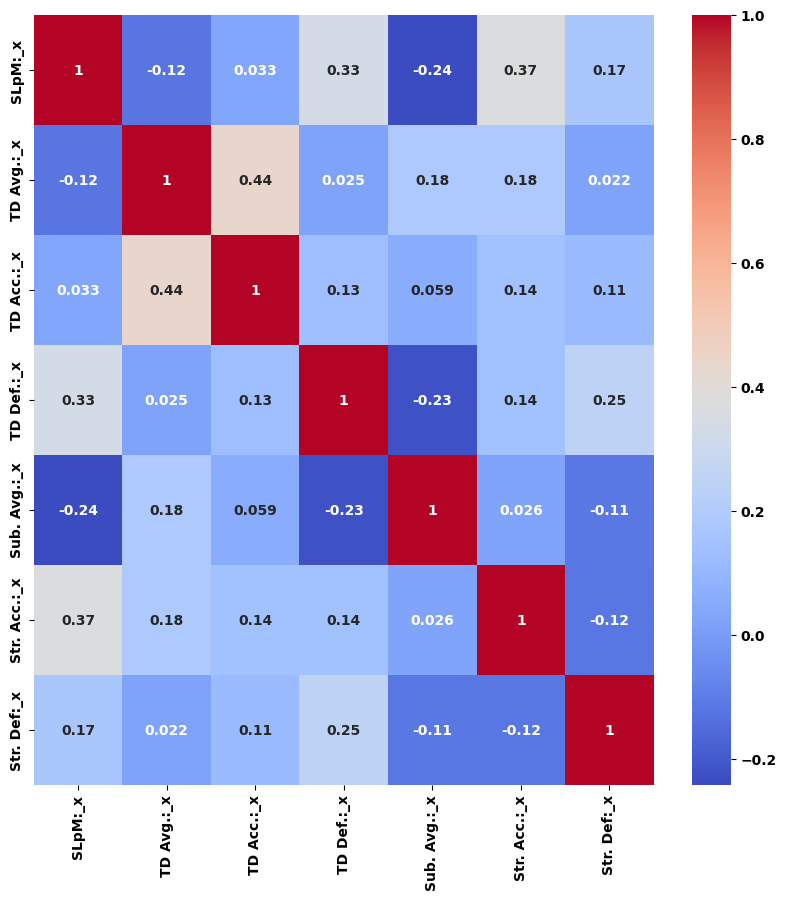

In [1742]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), cmap = "coolwarm", annot=True)

In [1745]:
from sklearn.preprocessing import StandardScaler

In [1747]:
scaler = StandardScaler()
dfscaled = scaler.fit_transform(df1)

In [1750]:
dfscaled = pd.DataFrame(dfscaled, columns=df1.columns)

In [1751]:
dfscaled.describe()

,SLpM:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Str. Acc.:_x,Str. Def:_x
count,1.809000e+03,1.809000e+03,1.809000e+03,1.809000e+03,1.809000e+03,1.809000e+03,1.809000e+03
mean,-1.885354e-16,1.178346e-17,1.571128e-17,4.713385e-17,4.713385e-17,-1.885354e-16,5.263280e-16
std,1.000277e+00,1.000277e+00,1.000277e+00,1.000277e+00,1.000277e+00,1.000277e+00,1.000277e+00
min,-2.187944e+00,-1.105231e+00,-1.558829e+00,-2.347140e+00,-7.253313e-01,-4.130528e+00,-5.171610e+00
25%,-7.130797e-01,-7.583267e-01,-5.962640e-01,-5.813028e-01,-7.253313e-01,-5.859817e-01,-5.710369e-01
50%,-6.302097e-02,-2.379696e-01,1.627736e-02,1.168190e-01,-2.613552e-01,7.862074e-02,1.367437e-01
75%,5.590783e-01,5.425660e-01,5.850657e-01,6.917429e-01,3.186148e-01,6.324561e-01,7.265608e-01
max,6.703182e+00,6.924168e+00,2.816466e+00,1.759459e+00,1.330994e+01,4.287770e+00,3.321756e+00


<Axes: >

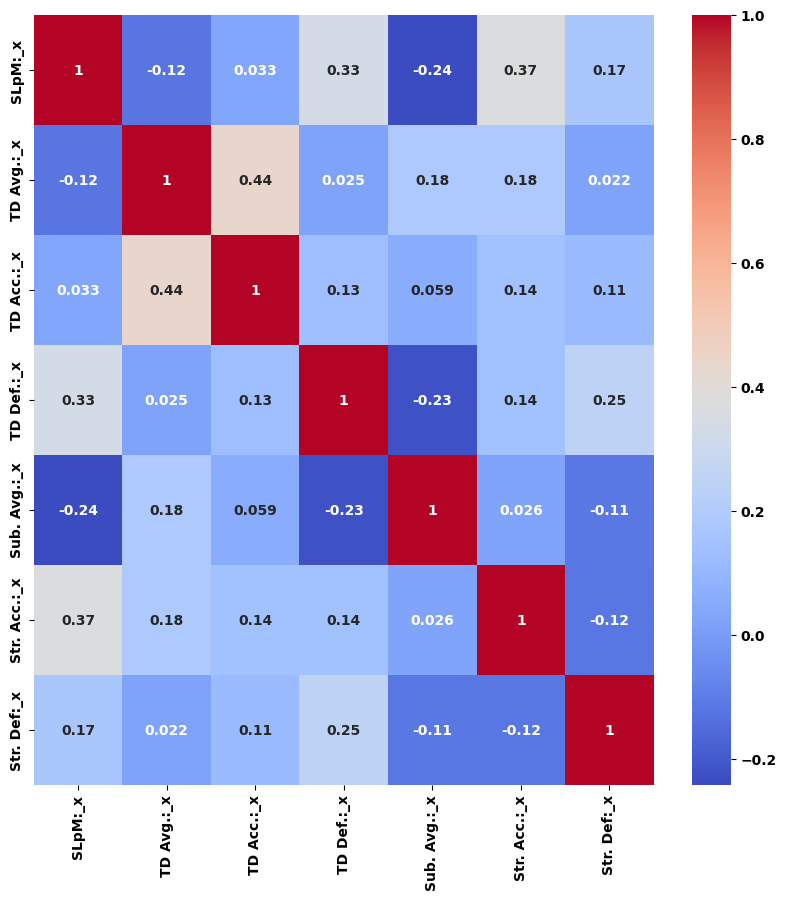

In [1752]:
plt.figure(figsize=(10,10))
sns.heatmap(dfscaled.corr(), cmap = "coolwarm", annot=True)

In [1755]:
dfscaled

,SLpM:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Str. Acc.:_x,Str. Def:_x
0,0.908572,-0.527057,0.103783,0.979205,-0.725331,-0.142913,0.726561
1,0.503159,-1.105231,-1.558829,-0.006379,0.666597,1.186291,-1.160854
2,-0.601242,-0.555966,2.816466,-0.622369,0.202621,-0.253680,-1.750671
3,2.732931,-0.902870,2.816466,1.102403,-0.725331,-0.475215,0.844524
4,1.943074,-0.953461,-0.465005,0.404281,-0.609337,0.300155,-0.099183
...,...,...,...,...,...,...,...
1804,-1.426047,-1.105231,-1.558829,-0.417039,0.550603,0.632456,0.018780
1805,-1.419057,-1.105231,-1.558829,-2.347140,-0.725331,3.401633,-3.874013
1806,-1.467987,-0.555966,0.235042,-0.827699,-0.145361,-0.253680,-0.217147
1807,-2.055136,-1.105231,-1.558829,-1.936481,-0.377349,0.189388,-1.750671


In [1756]:
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity

In [1759]:
# KMO (overall adequacy ~> 0.5 minimum, >0.6 better)
kmo_all, kmo_model = calculate_kmo(dfscaled)
print("KMO overall:", round(kmo_model, 3))

# Bartlett’s test (want p < 0.05)
chi2, p_value = calculate_bartlett_sphericity(df1)
print("Bartlett p:", p_value)


KMO overall: 0.547
Bartlett p: 1.35364439333519e-307


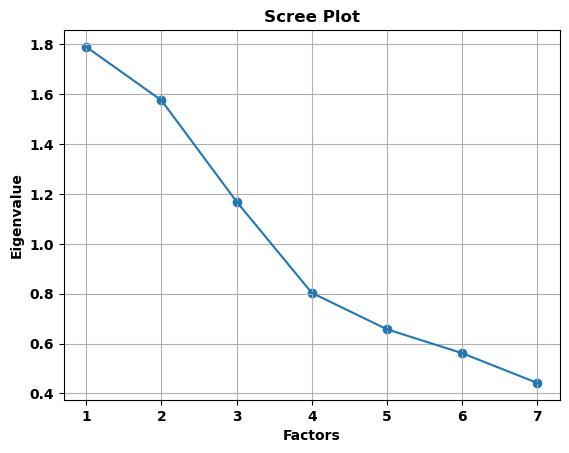

In [1764]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(rotation=None)
fa.fit(dfscaled) 

ev, v = fa.get_eigenvalues()

# Scree plot
plt.scatter(range(1, len(ev)+1), ev)
plt.plot(range(1, len(ev)+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [1766]:
fa = FactorAnalyzer(n_factors = 3, rotation = "promax")
fa.fit(dfscaled)


FactorAnalyzer(rotation_kwargs={})

In [1772]:
fa_df = pd.DataFrame( fa.loadings_, index=df1.columns, columns=[f"Factor{i+1}" for i in range(3)])

In [1774]:
fa_df

,Factor1,Factor2,Factor3
SLpM:_x,0.341073,-0.090423,0.512587
TD Avg.:_x,0.074701,0.765322,-0.113528
TD Acc.:_x,0.042842,0.583220,0.126884
TD Def.:_x,0.068633,0.119662,0.583366
Sub. Avg.:_x,0.024808,0.173661,-0.393848
Str. Acc.:_x,0.994936,0.158572,-0.066557
Str. Def:_x,-0.174298,0.125459,0.430432


In [ ]:
f1 = [""]

In [1642]:
fa.get_factor_variance()


(array([1.1007284 , 1.0928232 , 1.03482161, 0.91638596]),
 array([0.13759105, 0.1366029 , 0.1293527 , 0.11454824]),
 array([0.13759105, 0.27419395, 0.40354665, 0.51809489]))

In [1643]:
# factor1 = ["Sub. Avg.:_x", "Fighter_Wins_By_SUB_%"] #good bjj
# factor2 = ["SLpM:_x", "TD Def.:_x"] #typical striker
# factor3 = ["SApM:_x", "Str. Def.:_x"] #good strikingdefense
# factor4 = ["TD Avg.:_x", "TD Acc.:_x"] #good wrestler


In [1644]:
factor_scores = fa.transform(dfscaled)

In [1646]:
factor_scores_df = pd.DataFrame(factor_scores, columns = fa_df.columns)

In [1647]:
factor_scores_df_scaled = pd.DataFrame(scaler.fit_transform(factor_scores_df), columns=fa_df.columns)

In [1649]:
factor_scores_df_scaled

,Factor1,Factor2,Factor3,Factor4
0,0.377630,-0.143044,-0.333427,1.219598
1,0.222309,2.894055,1.054753,-0.781681
2,0.088599,0.367296,-0.926386,1.402740
3,-0.320275,2.086202,-1.327336,1.226457
4,-1.218908,0.341718,0.021955,0.320389
...,...,...,...,...
1804,0.791966,0.559248,-1.227339,-1.132649
1805,0.458452,-0.314494,-0.396629,-1.060851
1806,0.344235,3.383406,-1.302928,-1.661983
1807,-0.244740,-1.572249,-0.868757,-2.101593


In [1653]:
from sklearn.cluster import KMeans

In [1654]:
def optimize_k_means(data, max_k):
    means = []
    inertias = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)

    plt.plot(means, inertias)
    plt.grid(True)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertias")
    plt.show()

C:\Users\alexz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

C:\Users\alexz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

C:\Users\alexz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

C:\Users\alexz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

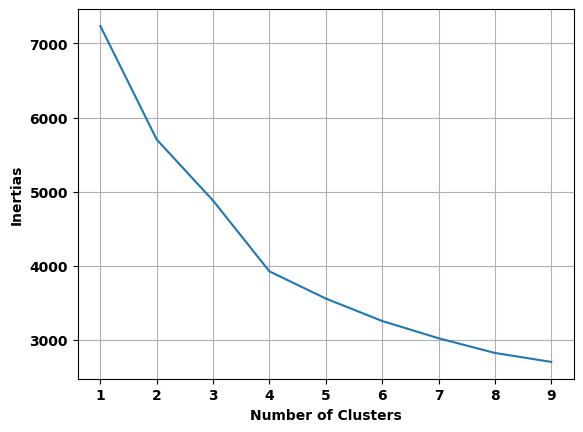

In [1657]:
optimize_k_means(factor_scores_df_scaled, 10)

In [1660]:
kmeans = KMeans(n_clusters=3, max_iter = 1000)
kmeans.fit(factor_scores_df_scaled)

C:\Users\alexz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



KMeans(max_iter=1000, n_clusters=3)

In [1662]:
factor_scores_df_scaled["KMeans Label"] = kmeans.labels_

In [1632]:
factor_scores_df_scaled.rename(columns={"Factor1":"Wrestler", "Factor2": "BJJ", "Factor3": "Striker"}, inplace=True)

In [1664]:
factor_scores_df_scaled["Fighter_Name"] = df["Fighter"]


In [1680]:
factor_scores_df_scaled.head(15)

,Factor1,Factor2,Factor3,Factor4,KMeans Label,Fighter_Name
0,0.377630,-0.143044,-0.333427,1.219598,2,Robert Whittaker
1,0.222309,2.894055,1.054753,-0.781681,2,Davey Grant
2,0.088599,0.367296,-0.926386,1.402740,2,Muslim Salikhov
3,-0.320275,2.086202,-1.327336,1.226457,2,Bogdan Guskov
4,-1.218908,0.341718,0.021955,0.320389,2,Bryce Mitchell
5,-0.621168,1.054047,1.637996,-0.689445,2,Billy Elekana
6,-0.108282,0.555468,-0.305874,0.396770,2,Marcus McGhee
7,-1.367116,1.718106,0.892981,-1.372107,2,Steven Nguyen
8,-0.920218,0.590527,-0.582179,1.797306,2,Shara Magomedov
9,-0.806105,-0.304293,0.116492,2.469025,2,Asu Almabayev


In [1668]:
factor_scores_df_scaled.drop_duplicates(subset="Fighter_Name", keep="first", inplace=True)

In [1674]:
cluster_means = factor_scores_df_scaled.groupby("KMeans Label")[["Factor1", "Factor2", "Factor3", "Factor4"]].median()
print(cluster_means)
#2 is wrestler, 0 is striker and 1 is bjj artist

               Factor1   Factor2   Factor3   Factor4
KMeans Label                                        
0             2.431192  0.102377 -0.146548  0.807860
1            -0.455094 -0.481259 -0.543534 -0.502003
2            -0.327171  0.586468  0.066080  0.639374


In [1676]:
factor_scores_df_scaled[factor_scores_df_scaled["Fighter_Name"].isin(["Islam Makhachev", "Khabib Nurmagomedov", "Jon Jones", "Sean Strickland", "Israel Adesanya", "Alex Pereira", "Jiri Prochazka", "Belal Muhammad"])]

,Factor1,Factor2,Factor3,Factor4,KMeans Label,Fighter_Name
163,0.584084,-0.072724,-0.814566,-0.061977,1,Belal Muhammad
290,-1.272937,0.930054,-0.628984,0.301477,2,Alex Pereira
357,-0.830460,-0.132029,-1.124474,-1.353616,1,Sean Strickland
366,-0.603391,-0.217610,0.213142,-0.951173,1,Israel Adesanya
380,-0.608804,1.073112,0.034460,1.109617,2,Jiri Prochazka
381,-0.570912,-0.235088,-0.959896,1.020513,2,Islam Makhachev
467,-1.645912,0.844683,0.140210,0.442278,2,Jon Jones


In [1678]:
factor_scores_df_scaled[factor_scores_df_scaled["Fighter_Name"] == "Charles Oliveira"]

,Factor1,Factor2,Factor3,Factor4,KMeans Label,Fighter_Name
74,-0.522956,1.209556,0.645876,-0.560323,2,Charles Oliveira


In [1334]:
import plotly.express as px

fig = px.scatter_3d(
    factor_scores_df_scaled,
    x="Bjj", y="GoodStrikerandTDD", z="Wrestling",
    color="KMeans Label",
    opacity=0.5, 
    width = 1000,
    height = 1000
)

fig.update_traces(marker=dict(size=3))
fig.show()


In [1800]:
df[["Fighter"]].isna().sum()

Fighter    0
dtype: int64

In [2026]:
df[df["Fighter"] == "Ciryl Gane"]

,Unnamed: 0.1,Unnamed: 0_x,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner_x,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Losses_Before_Fight,Weight_class_x,Method,Round,Opp_KD_Absorbed,Opp_STR_Absorbed,Opp_SUB_Faced,Opp_Is_Winner,Opp_Days_Since_Last_Fight,Opp_Prev_KD_Absorbed,Opp_Prev_STR_Absorbed,Opp_Prev_SUB_Faced,Opp_Past_3_KD_Absorbed,Opp_Past_3_STR_Absorbed,Opp_Past_3_SUB_Faced,Opp_UFC_Debut,Opp_Won_Last_Fight,Opp_Prev_3_Fight_Win_Rate,Opp_Wins_Before_Fight,Opp_Losses_Before_Fight,Fighter_Wins_By_KO,Fighter_Wins_By_SUB,Fighter_Wins_By_DEC,Fighter_Loss_By_KO,Fighter_Loss_By_SUB,Fighter_Loss_By_DEC,Opponent_Wins_By_KO,Opponent_Wins_By_SUB,Opponent_Wins_By_DEC,Opponent_Loss_By_KO,Opponent_Loss_By_SUB,Opponent_Loss_By_DEC,Total_Fights_Before,Opp_Total_Fights_Before,Fighter_Wins_By_KO_%,Opponent_Wins_By_KO_%,Fighter_Wins_By_SUB_%,Opponent_Wins_By_SUB_%,Fighter_Wins_By_DEC_%,Opponent_Wins_By_DEC_%,Fighter_Loss_By_KO_%,Opponent_Loss_By_KO_%,Fighter_Loss_By_SUB_%,Opponent_Loss_By_SUB_%,Fighter_Loss_By_DEC_%,Opponent_Loss_By_DEC_%,Fighter_Current_Win_Streak,Opponent_Current_Win_Streak,Name_x,Nickname_x,Name_y,Nickname_y,Weight_class_lbs,SLpM:_x,Str. Acc.:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ht._x,Reach_x,SLpM:_y,Str. Acc.:_y,SApM:_y,Str. Def:_y,TD Avg.:_y,TD Acc.:_y,TD Def.:_y,Sub. Avg.:_y,Ht._y,Reach_y,Closed_Stance,Matchup_ID,Fighter_Prev_3_Missing,Opp_Prev_3_Missing,Prev_KD_Absorbed_Ratio,Past_3_KD_Absorbed_Ratio,Past_3_SUB_Faced_Ratio,Prev_SUB_Faced_Ratio,Fighter_Overall_Win_%,Opponent_Overall_Win_%,Prev_KD_Absorbed_Diff,Prev_STR_Absorbed_Diff,Prev_SUB_Faced_Diff,Past_3_KD_Absorbed_Diff,Past_3_STR_Absorbed_Diff,Past_3_SUB_Faced_Diff,Days_Since_Last_Fight_Diff,Won_Last_Fight_Diff,Prev_3_Fight_Win_Rate_Diff,Wins_Before_Fight_Diff,Losses_Before_Fight_Diff,Wins_By_KO_Diff,Wins_By_SUB_Diff,Wins_By_DEC_Diff,Loss_By_KO_Diff,Loss_By_SUB_Diff,Loss_By_DEC_Diff,Wins_By_KO_%_Diff,Wins_By_SUB_%_Diff,Wins_By_DEC_%_Diff,Loss_By_KO_%_Diff,Loss_By_SUB_%_Diff,Loss_By_DEC_%_Diff,Current_Win_Streak_Diff,Overall_Win_%_Diff,SLpM:_Diff,Str. Acc.:_Diff,SApM:_Diff,Str. Def:_Diff,TD Avg.:_Diff,TD Acc.:_Diff,TD Def.:_Diff,Sub. Avg.:_Diff,Ht._Diff,Reach_Diff,Prev_3_Stats_Missing,SLpM:_Ratio,Str. Acc.:_Ratio,SApM:_Ratio,Str. Def:_Ratio,TD Avg.:_Ratio,TD Acc.:_Ratio,TD Def.:_Ratio,Sub. Avg.:_Ratio,Ht._Ratio,Reach_Ratio,Overall_Win_%_Ratio,Wins_By_KO_%_Ratio,Wins_By_SUB_%_Ratio,Wins_By_DEC_%_Ratio,Loss_By_KO_%_Ratio,Loss_By_SUB_%_Ratio,Loss_By_DEC_%_Ratio,Current_Win_Streak_Ratio,Days_Since_Last_Fight_Ratio,Unnamed: 0_y,Weight_class_y,Ape_Ratio_x,Ape_Ratio_y,Weight_class_kg,Ht_x_m,Ht_y_m,BMI_x,BMI_y
433,8919,8929,2024-12-07,Ciryl Gane,Alexander Volkov,0.0,39.0,1.0,True,462.0,0.0,11.0,0.0,0.333333,15.000000,0.333333,False,1.0,0.666667,9.0,2.0,Heavyweight,DEC,3,0.0,43.0,2.0,False,168,0.0,46.0,0.0,0.000000,24.666667,0.000000,False,True,1.000000,12,4,4.0,2.0,3.0,0.0,1.0,1.0,6.0,1.0,5.0,1.0,1.0,2.0,11,16,0.444444,0.500000,0.222222,0.083333,0.333333,0.416667,0.0,0.250000,0.5,0.250000,0.5,0.500000,1,4,Ciryl Gane,Bon Gamin,Alexander Volkov,Drago,265,5.26,0.61,2.23,0.61,0.7,0.25,0.43,0.6,76.0,81.0,4.97,0.57,2.99,0.54,0.61,0.66,0.72,0.2,79.0,80.0,True,"(Timestamp('2024-12-07 00:00:00'), ('Alexander...",False,False,1.0,1.333333,1.333333,1.0,0.818182,0.750000,0.0,-35.0,0.0,0.333333,-9.666667,0.333333,294.0,0.0,-0.333333,-3.0,-2.0,-2.0,1.0,-2.0,-1.0,0.0,-1.0,-0.055556,0.138889,-0.083333,-0.250000,0.250000,0.000000,-3,0.068182,0.29,0.04,-0.76,0.07,0.09,-0.41,-0.29,0.4,-3.0,1.0,False,1.048576,1.025478,0.809524,1.045455,1.055901,0.753012,0.831395,1.333333,0.962500,1.012346,1.038961,0.962963,1.128205,0.941176,0.800000,1.200000,1.000000,0.400000,2.739645,8919,Heavyweight,1.065789,1.012658,120.20188,1.9304,2.0066,32.256455,29.853114
1287,3686,3692,2023-09-02,Ciryl Gane,Serghei Sp

In [2137]:
#Factor Analysis using composite variables
features_to_use = ["SLpM:_x","SApM:_x","Str. Def:_x","TD Avg.:_x","TD Acc.:_x","TD Def.:_x","Sub. Avg.:_x", "Ape_Ratio_x", "BMI_x", "Str. Acc.:_x", "Fighter", "Fighter_Wins_By_SUB_%", "Fighter_Wins_By_KO_%"]
df2 = df.drop_duplicates(subset=["Fighter"], keep="first").reset_index()[features_to_use]

In [2139]:
df2scaled = scaler.fit_transform(df2[[x for x in features_to_use if x != "Fighter"]])
df2scaled = pd.DataFrame(df2scaled, columns=[x for x in features_to_use if x != "Fighter"])
df2scaled

,SLpM:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ape_Ratio_x,BMI_x,Str. Acc.:_x,Fighter_Wins_By_SUB_%,Fighter_Wins_By_KO_%
0,0.908608,-0.097184,0.725979,-0.527259,0.103435,0.979446,-0.725637,-0.348746,0.341589,-0.142653,-0.581373,0.268326
1,0.503286,-0.225065,-1.161932,-1.105321,-1.558881,-0.005995,0.666108,-0.369680,0.488408,1.186246,0.632236,1.218732
2,-0.600867,0.946058,-1.751905,-0.556162,2.815635,-0.621897,0.202193,1.312319,-0.671985,-0.253395,-0.581373,-0.800880
3,2.732557,2.561401,0.843974,-0.902999,2.815635,1.102626,-0.725637,0.189346,-0.999769,-0.474878,-0.581373,-0.800880
4,1.942878,1.356625,-0.099982,-0.953580,-0.465252,0.404605,-0.609659,-0.355915,0.153439,0.300313,-0.061255,0.497442
...,...,...,...,...,...,...,...,...,...,...,...,...
1803,-1.425488,-1.510609,0.018012,-1.105321,-1.558881,-0.416596,0.550130,-0.872095,1.063236,0.632538,-0.581373,2.228537
1804,-1.418499,1.942186,-3.875806,-1.105321,-1.558881,-2.346420,-0.725637,-0.872095,0.955951,3.401079,-0.581373,2.228537
1805,-1.467417,-0.662554,-0.217977,-0.556162,0.234671,-0.827197,-0.145743,-0.872095,0.537745,-0.253395,-0.581373,2.228537
1806,-2.054435,-1.093312,-1.751905,-1.105321,-1.558881,-1.935819,-0.377701,-0.872095,-0.219074,0.189572,-0.581373,-0.800880


In [2141]:
df2scaled["Fighter"] = df2["Fighter"]
df2scaled.isna().sum()

SLpM:_x                  0
SApM:_x                  0
Str. Def:_x              0
TD Avg.:_x               0
TD Acc.:_x               0
TD Def.:_x               0
Sub. Avg.:_x             0
Ape_Ratio_x              0
BMI_x                    0
Str. Acc.:_x             0
Fighter_Wins_By_SUB_%    0
Fighter_Wins_By_KO_%     0
Fighter                  0
dtype: int64

In [2143]:
df2scaled

,SLpM:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ape_Ratio_x,BMI_x,Str. Acc.:_x,Fighter_Wins_By_SUB_%,Fighter_Wins_By_KO_%,Fighter
0,0.908608,-0.097184,0.725979,-0.527259,0.103435,0.979446,-0.725637,-0.348746,0.341589,-0.142653,-0.581373,0.268326,Robert Whittaker
1,0.503286,-0.225065,-1.161932,-1.105321,-1.558881,-0.005995,0.666108,-0.369680,0.488408,1.186246,0.632236,1.218732,Bogdan Guskov
2,-0.600867,0.946058,-1.751905,-0.556162,2.815635,-0.621897,0.202193,1.312319,-0.671985,-0.253395,-0.581373,-0.800880,Mohammad Yahya
3,2.732557,2.561401,0.843974,-0.902999,2.815635,1.102626,-0.725637,0.189346,-0.999769,-0.474878,-0.581373,-0.800880,Steven Nguyen
4,1.942878,1.356625,-0.099982,-0.953580,-0.465252,0.404605,-0.609659,-0.355915,0.153439,0.300313,-0.061255,0.497442,Marc-Andre Barriault
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,-1.425488,-1.510609,0.018012,-1.105321,-1.558881,-0.416596,0.550130,-0.872095,1.063236,0.632538,-0.581373,2.228537,Semmy Schilt
1804,-1.418499,1.942186,-3.875806,-1.105321,-1.558881,-2.346420,-0.725637,-0.872095,0.955951,3.401079,-0.581373,2.228537,Lance Gibson
1805,-1.467417,-0.662554,-0.217977,-0.556162,0.234671,-0.827197,-0.145743,-0.872095,0.537745,-0.253395,-0.581373,2.228537,Yuki Kondo
1806,-2.054435,-1.093312,-1.751905,-1.105321,-1.558881,-1.935819,-0.377701,-0.872095,-0.219074,0.189572,-0.581373,-0.800880,Kenichi Yamamoto


In [2145]:
striking_ability = ["SLpM:_x", "Str. Acc.:_x"]
grappling_offense = ["TD Avg.:_x", "TD Acc.:_x", "Sub. Avg.:_x"]
overall_defense = ["Str. Def:_x", "TD Def.:_x"]
physical_attributes = ["BMI_x", "Ape_Ratio_x"]

In [2147]:
df2[striking_ability]
df2scaled["Striking_Ability"] = (df2scaled["SLpM:_x"] + df2scaled["Str. Acc.:_x"] + df2scaled["Fighter_Wins_By_KO_%"])/3

In [2149]:
df2scaled["Wrestling_Ability"] = (df2scaled[grappling_offense[0]] + df2scaled[grappling_offense[1]])/2

df2scaled["BJJ Ability"] = (df2scaled["Sub. Avg.:_x"] + df2scaled["Fighter_Wins_By_SUB_%"]) / 2
# df2scaled["Physical_Attributes"] = (df2["BMI_x"] + df["Ape_Ratio_x"]) / 2

 

In [2151]:
df2scaled.describe()

,SLpM:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ape_Ratio_x,BMI_x,Str. Acc.:_x,Fighter_Wins_By_SUB_%,Fighter_Wins_By_KO_%,Striking_Ability,Wrestling_Ability,BJJ Ability
count,1.808000e+03,1.808000e+03,1.808000e+03,1.808000e+03,1.808000e+03,1.808000e+03,1.808000e+03,1.808000e+03,1.808000e+03,1.808000e+03,1.808000e+03,1.808000e+03,1.808000e+03,1.808000e+03,1.808000e+03
mean,3.143994e-17,-1.571997e-17,1.532697e-16,-2.082896e-16,1.964997e-16,-1.414797e-16,-6.287989e-17,-2.075036e-15,-1.729197e-16,-1.414797e-16,1.178998e-17,7.859986e-17,-3.143994e-17,-1.964997e-18,-2.357996e-17
std,1.000277e+00,1.000277e+00,1.000277e+00,1.000277e+00,1.000277e+00,1.000277e+00,1.000277e+00,1.000277e+00,1.000277e+00,1.000277e+00,1.000277e+00,1.000277e+00,7.237158e-01,8.476151e-01,8.577630e-01
min,-2.187213e+00,-2.022135e+00,-5.173745e+00,-1.105321e+00,-1.558881e+00,-2.346420e+00,-7.256374e-01,-3.056510e+00,-1.901063e+00,-4.129352e+00,-5.813728e-01,-8.008800e-01,-2.372482e+00,-1.332101e+00,-6.535051e-01
25%,-7.126800e-01,-6.625542e-01,-5.719600e-01,-7.584837e-01,-5.964875e-01,-5.808365e-01,-7.256374e-01,-8.720954e-01,-6.153902e-01,-5.856198e-01,-5.813728e-01,-8.008800e-01,-4.874375e-01,-5.358019e-01,-6.535051e-01
50%,-6.626139e-02,-1.577595e-01,1.360069e-01,-2.382271e-01,1.594472e-02,1.171847e-01,-2.617221e-01,-3.011688e-01,-2.190741e-01,7.882991e-02,-5.813728e-01,-4.642780e-01,-3.517832e-02,7.114253e-04,-3.354567e-01
75%,5.609394e-01,4.614553e-01,7.259794e-01,5.421577e-01,5.846318e-01,6.920257e-01,3.181720e-01,7.200661e-01,3.415889e-01,6.325380e-01,3.288336e-01,7.138288e-01,4.462741e-01,5.463064e-01,3.309748e-01
max,6.701916e+00,9.628527e+00,3.321858e+00,6.922527e+00,2.815635e+00,1.759588e+00,1.330780e+01,3.649643e+00,4.211824e+00,4.287012e+00,3.059453e+00,2.228537e+00,3.519889e+00,4.431629e+00,8.183627e+00


In [2153]:
df2scaled = scaler.fit_transform(df2scaled[["Striking_Ability", "Wrestling_Ability", "BJJ Ability"]])
df2scaled = pd.DataFrame(df2scaled, columns =["Striking_Ability", "Wrestling_Ability", "BJJ Ability"] )

In [2155]:
df2scaled.describe()

,Striking_Ability,Wrestling_Ability,BJJ Ability
count,1808.000000,1.808000e+03,1.808000e+03
mean,0.000000,-5.894990e-18,-5.501990e-17
std,1.000277,1.000277e+00,1.000277e+00
min,-3.279102,-1.572022e+00,-7.620822e-01
25%,-0.673707,-6.323037e-01,-7.620822e-01
50%,-0.048621,8.395581e-04,-3.911914e-01
75%,0.616813,6.447001e-01,3.859649e-01
max,4.864980,5.229797e+00,9.543301e+00


C:\Users\alexz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

C:\Users\alexz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

C:\Users\alexz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

C:\Users\alexz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

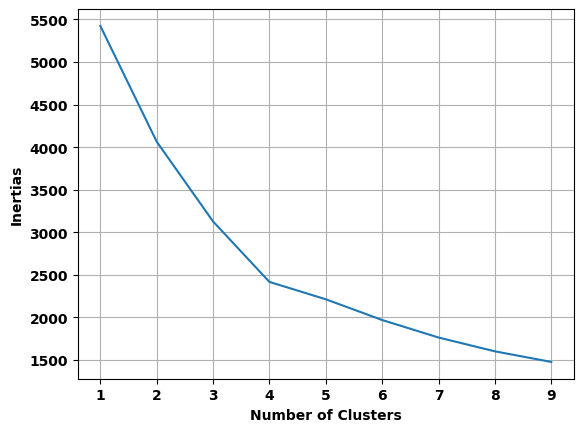

In [2157]:
optimize_k_means(df2scaled, 10)

In [2163]:
kmeans2 = KMeans(n_clusters = 4, max_iter=1000)
kmeans2.fit(df2scaled)
df2scaled["KMeans_Label"] = kmeans2.labels_

C:\Users\alexz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



In [2165]:
df2["KMeans_Label"] = kmeans2.labels_
df2

,SLpM:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ape_Ratio_x,BMI_x,Str. Acc.:_x,Fighter,Fighter_Wins_By_SUB_%,Fighter_Wins_By_KO_%,KMeans_Label
0,4.54,3.41,0.59,0.80,0.38,0.81,0.0,1.013889,25.090233,0.43,Robert Whittaker,0.000000,0.352941,2
1,3.96,3.22,0.43,0.00,0.00,0.57,1.2,1.013333,25.622959,0.55,Bogdan Guskov,0.333333,0.666667,2
2,2.38,4.96,0.38,0.76,1.00,0.42,0.8,1.057971,21.412520,0.42,Mohammad Yahya,0.000000,0.000000,3
3,7.15,7.36,0.60,0.28,1.00,0.84,0.0,1.028169,20.223171,0.40,Steven Nguyen,0.000000,0.000000,3
4,6.02,5.57,0.52,0.21,0.25,0.67,0.1,1.013699,24.407537,0.47,Marc-Andre Barriault,0.142857,0.428571,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,1.20,1.31,0.53,0.00,0.00,0.47,1.1,1.000000,27.708698,0.50,Semmy Schilt,0.000000,1.000000,2
1804,1.21,6.44,0.20,0.00,0.00,0.00,0.0,1.000000,27.319422,0.75,Lance Gibson,0.000000,1.000000,2
1805,1.14,2.57,0.51,0.76,0.41,0.37,0.5,1.000000,25.801977,0.42,Yuki Kondo,0.000000,1.000000,2
1806,0.30,1.93,0.38,0.00,0.00,0.10,0.3,1.000000,23.055889,0.46,Kenichi Yamamoto,0.000000,0.000000,1


In [2167]:
["Striking_Ability", "Wrestling_Ability", "BJJ Ability"]

['Striking_Ability', 'Wrestling_Ability', 'BJJ Ability']

In [2169]:
fig = px.scatter_3d(
    df2scaled,
    x="Striking_Ability", y="Wrestling_Ability", z="BJJ Ability",
    color="KMeans_Label",
    opacity=0.5, 
    width = 1000,
    height = 1000
)

fig.update_traces(marker=dict(size=3))
fig.show()

In [2171]:
#0 is submission artist, #3 effective offensive wrestlers and grappling, 2 effective striking #1 is not exceeding at any field

In [2188]:
df2[df2["Fighter"].isin(["Islam Makhachev", "Khabib Nurmagomedov", "Jon Jones", "Sean Strickland", "Israel Adesanya", "Alex Pereira", "Jiri Prochazka", "Belal Muhammad", "Charles Oliveira", "Sean Brady", "Arman Tsarukyan",  "Stephen Thompson",
    "Robert Whittaker",
    "Max Holloway",
    "Conor McGregor",
    "Joanna Jedrzejczyk",
    "Jose Aldo",
    "Cyril Gane",  "Sam Alvey",
    "Jim Miller",
    "Diego Sanchez",
    "Clay Guida",
    "Darren Till",
    "Chris Leben",
    "Michael Johnson",
    "Jeremy Stephens",
    "Ross Pearson",
    "Court McGee", "Daniel Cormier", "Merab Dvalishvili", "Ciryl Gane"])]

,SLpM:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ape_Ratio_x,BMI_x,Str. Acc.:_x,Fighter,Fighter_Wins_By_SUB_%,Fighter_Wins_By_KO_%,KMeans_Label
0,4.54,3.41,0.59,0.80,0.38,0.81,0.0,1.013889,25.090233,0.43,Robert Whittaker,0.000000,0.352941,2
29,4.23,3.80,0.58,0.61,0.40,0.81,0.0,1.042857,22.239938,0.39,Michael Johnson,0.000000,0.400000,2
33,7.16,4.76,0.59,0.25,0.53,0.83,0.3,0.971831,21.617873,0.47,Max Holloway,0.090909,0.500000,2
57,4.05,3.00,0.54,0.23,0.35,0.63,0.0,1.041667,23.055889,0.46,Stephen Thompson,0.000000,0.500000,2
74,3.41,3.26,0.48,2.23,0.39,0.56,2.6,1.057143,22.239938,0.55,Charles Oliveira,0.695652,0.173913,0
112,4.50,3.65,0.60,1.78,0.24,0.70,0.5,1.056338,23.709925,0.36,Court McGee,0.272727,0.000000,1
118,4.31,2.48,0.56,5.84,0.35,0.82,0.3,1.030303,21.789329,0.42,Merab Dvalishvili,0.000000,0.083333,3
159,4.46,3.78,0.55,2.24,0.38,0.90,0.1,1.014085,23.709925,0.43,Belal Muhammad,0.066667,0.133333,3
163,3.65,3.81,0.60,0.47,0.51,0.92,0.1,1.044776,22.709959,0.46,Jose Aldo,0.000000,0.285714,2
171,3.15,3.14,0.58,1.11,0.38,0.62,0.4,1.028986,22.889245,0.40,Jeremy Stephens,0.000000,0.533333,2


In [2178]:
df2[df2["KMeans_Label"] == 1].describe() #Mid they don't excell anywhere but are relatively proficient in most aspects of the game

,SLpM:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ape_Ratio_x,BMI_x,Str. Acc.:_x,Fighter_Wins_By_SUB_%,Fighter_Wins_By_KO_%,KMeans_Label
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.0
mean,2.591486,3.872727,0.513259,0.583437,0.166075,0.504922,0.356541,1.018512,23.569454,0.382838,0.041194,0.103022,1.0
std,1.087635,1.803405,0.099057,0.613166,0.152802,0.257784,0.522788,0.025585,3.674596,0.079824,0.114920,0.230666,0.0
min,0.210000,0.580000,0.090000,0.000000,0.000000,0.000000,0.000000,0.942029,17.935434,0.090000,0.000000,0.000000,1.0
25%,1.735000,2.825000,0.450000,0.000000,0.000000,0.330000,0.000000,1.000000,21.143755,0.330000,0.000000,0.000000,1.0
50%,2.570000,3.580000,0.520000,0.460000,0.160000,0.550000,0.100000,1.013889,22.889245,0.390000,0.000000,0.000000,1.0
75%,3.375000,4.410000,0.580000,0.985000,0.280000,0.675000,0.500000,1.040541,24.392190,0.440000,0.000000,0.000000,1.0
max,5.960000,17.860000,0.740000,2.820000,0.500000,1.000000,3.100000,1.101449,39.133226,0.660000,0.500000,1.000000,1.0


In [2180]:
df2[df2["KMeans_Label"] == 0].describe() #BJJ, highest wins by sub % on average and second highest td avg and td accuracy, highest sub average 

,SLpM:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ape_Ratio_x,BMI_x,Str. Acc.:_x,Fighter_Wins_By_SUB_%,Fighter_Wins_By_KO_%,KMeans_Label
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.0
mean,2.513196,3.175120,0.517698,1.951959,0.380997,0.466495,1.781443,1.021463,23.393165,0.438832,0.655866,0.100733,0.0
std,1.090624,1.272288,0.084400,1.489472,0.201435,0.237473,1.326650,0.025669,3.155168,0.096182,0.298436,0.176666,0.0
min,0.110000,0.880000,0.260000,0.000000,0.000000,0.000000,0.000000,0.957143,16.952860,0.070000,0.000000,0.000000,0.0
25%,1.790000,2.285000,0.460000,0.965000,0.260000,0.330000,1.000000,1.000000,21.412520,0.390000,0.500000,0.000000,0.0
50%,2.440000,3.020000,0.520000,1.740000,0.360000,0.500000,1.500000,1.014706,22.889245,0.440000,0.600000,0.000000,0.0
75%,3.180000,3.845000,0.580000,2.580000,0.475000,0.600000,2.200000,1.041667,24.407537,0.490000,1.000000,0.170290,0.0
max,6.190000,8.160000,0.760000,11.110000,1.000000,1.000000,12.100000,1.102941,34.023610,0.830000,1.000000,1.000000,0.0


In [2182]:
df2[df2["KMeans_Label"] == 2].describe() #effective striking, highest strikes landed per minute, most wins by ko by percentage, and best takedown defense

,SLpM:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ape_Ratio_x,BMI_x,Str. Acc.:_x,Fighter_Wins_By_SUB_%,Fighter_Wins_By_KO_%,KMeans_Label
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.0
mean,4.530578,3.974024,0.529124,0.936753,0.328068,0.643347,0.315339,1.027049,24.581735,0.499223,0.059804,0.562580,2.0
std,1.447051,1.357970,0.071105,0.809243,0.206764,0.202843,0.421507,0.028766,4.165934,0.070053,0.120880,0.333333,0.0
min,1.010000,0.760000,0.190000,0.000000,0.000000,0.000000,0.000000,0.946667,18.459069,0.320000,0.000000,0.000000,2.0
25%,3.580000,3.002500,0.490000,0.352500,0.200000,0.530000,0.000000,1.000000,21.789329,0.450000,0.000000,0.333333,2.0
50%,4.440000,3.820000,0.530000,0.760000,0.330000,0.660000,0.200000,1.027397,23.567408,0.490000,0.000000,0.500000,2.0
75%,5.350000,4.720000,0.570000,1.367500,0.450000,0.770000,0.500000,1.044118,25.622959,0.540000,0.000000,1.000000,2.0
max,12.830000,12.830000,0.730000,5.130000,1.000000,1.000000,2.400000,1.120000,39.133226,0.750000,0.500000,1.000000,2.0


In [2184]:
df2[df2["KMeans_Label"] == 3].describe() #Offensive wrestling, highest amount of takedowns and takedown accuracy on average

,SLpM:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ape_Ratio_x,BMI_x,Str. Acc.:_x,Fighter_Wins_By_SUB_%,Fighter_Wins_By_KO_%,KMeans_Label
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.0
mean,2.984291,3.122021,0.545621,2.596241,0.520975,0.614840,0.520745,1.024240,23.661286,0.442837,0.087318,0.212386,3.0
std,0.996803,1.230790,0.080710,1.364602,0.181741,0.236578,0.508869,0.025086,3.198716,0.078955,0.142087,0.275223,0.0
min,0.480000,0.550000,0.220000,0.110000,0.200000,0.000000,0.000000,0.955224,17.810906,0.190000,0.000000,0.000000,3.0
25%,2.270000,2.267500,0.500000,1.687500,0.400000,0.500000,0.000000,1.000000,21.617873,0.400000,0.000000,0.000000,3.0
50%,2.960000,2.935000,0.550000,2.465000,0.475000,0.650000,0.400000,1.027027,22.889245,0.440000,0.000000,0.066964,3.0
75%,3.630000,3.720000,0.600000,3.290000,0.600000,0.770000,0.800000,1.042254,25.090233,0.490000,0.166667,0.375000,3.0
max,7.150000,8.850000,0.810000,8.410000,1.000000,1.000000,3.100000,1.117647,38.023120,0.790000,0.600000,1.000000,3.0


In [2197]:
label_map = {
    0: "BJJ",
    1: "Balanced/Mid",
    2: "DangerousStriking/TDD",
    3: "OffensiveGrappler"
}
df2["Fight Style"] = df2["KMeans_Label"].map(label_map)

In [2205]:
df2

,SLpM:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ape_Ratio_x,BMI_x,Str. Acc.:_x,Fighter,Fighter_Wins_By_SUB_%,Fighter_Wins_By_KO_%,KMeans_Label,Fight Style
0,4.54,3.41,0.59,0.80,0.38,0.81,0.0,1.013889,25.090233,0.43,Robert Whittaker,0.000000,0.352941,2,DangerousStriking/TDD
1,3.96,3.22,0.43,0.00,0.00,0.57,1.2,1.013333,25.622959,0.55,Bogdan Guskov,0.333333,0.666667,2,DangerousStriking/TDD
2,2.38,4.96,0.38,0.76,1.00,0.42,0.8,1.057971,21.412520,0.42,Mohammad Yahya,0.000000,0.000000,3,OffensiveGrappler
3,7.15,7.36,0.60,0.28,1.00,0.84,0.0,1.028169,20.223171,0.40,Steven Nguyen,0.000000,0.000000,3,OffensiveGrappler
4,6.02,5.57,0.52,0.21,0.25,0.67,0.1,1.013699,24.407537,0.47,Marc-Andre Barriault,0.142857,0.428571,2,DangerousStriking/TDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,1.20,1.31,0.53,0.00,0.00,0.47,1.1,1.000000,27.708698,0.50,Semmy Schilt,0.000000,1.000000,2,DangerousStriking/TDD
1804,1.21,6.44,0.20,0.00,0.00,0.00,0.0,1.000000,27.319422,0.75,Lance Gibson,0.000000,1.000000,2,DangerousStriking/TDD
1805,1.14,2.57,0.51,0.76,0.41,0.37,0.5,1.000000,25.801977,0.42,Yuki Kondo,0.000000,1.000000,2,DangerousStriking/TDD
1806,0.30,1.93,0.38,0.00,0.00,0.10,0.3,1.000000,23.055889,0.46,Kenichi Yamamoto,0.000000,0.000000,1,Balanced/Mid


In [2207]:
dffull = pd.merge(left = df, right = df2[["Fighter", "Fight Style"]], on="Fighter")
dffull

,Unnamed: 0.1,Unnamed: 0_x,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner_x,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Losses_Before_Fight,Weight_class_x,Method,Round,Opp_KD_Absorbed,Opp_STR_Absorbed,Opp_SUB_Faced,Opp_Is_Winner,Opp_Days_Since_Last_Fight,Opp_Prev_KD_Absorbed,Opp_Prev_STR_Absorbed,Opp_Prev_SUB_Faced,Opp_Past_3_KD_Absorbed,Opp_Past_3_STR_Absorbed,Opp_Past_3_SUB_Faced,Opp_UFC_Debut,Opp_Won_Last_Fight,Opp_Prev_3_Fight_Win_Rate,Opp_Wins_Before_Fight,Opp_Losses_Before_Fight,Fighter_Wins_By_KO,Fighter_Wins_By_SUB,Fighter_Wins_By_DEC,Fighter_Loss_By_KO,Fighter_Loss_By_SUB,Fighter_Loss_By_DEC,Opponent_Wins_By_KO,Opponent_Wins_By_SUB,Opponent_Wins_By_DEC,Opponent_Loss_By_KO,Opponent_Loss_By_SUB,Opponent_Loss_By_DEC,Total_Fights_Before,Opp_Total_Fights_Before,Fighter_Wins_By_KO_%,Opponent_Wins_By_KO_%,Fighter_Wins_By_SUB_%,Opponent_Wins_By_SUB_%,Fighter_Wins_By_DEC_%,Opponent_Wins_By_DEC_%,Fighter_Loss_By_KO_%,Opponent_Loss_By_KO_%,Fighter_Loss_By_SUB_%,Opponent_Loss_By_SUB_%,Fighter_Loss_By_DEC_%,Opponent_Loss_By_DEC_%,Fighter_Current_Win_Streak,Opponent_Current_Win_Streak,Name_x,Nickname_x,Name_y,Nickname_y,Weight_class_lbs,SLpM:_x,Str. Acc.:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ht._x,Reach_x,SLpM:_y,Str. Acc.:_y,SApM:_y,Str. Def:_y,TD Avg.:_y,TD Acc.:_y,TD Def.:_y,Sub. Avg.:_y,Ht._y,Reach_y,Closed_Stance,Matchup_ID,Fighter_Prev_3_Missing,Opp_Prev_3_Missing,Prev_KD_Absorbed_Ratio,Past_3_KD_Absorbed_Ratio,Past_3_SUB_Faced_Ratio,Prev_SUB_Faced_Ratio,Fighter_Overall_Win_%,Opponent_Overall_Win_%,Prev_KD_Absorbed_Diff,Prev_STR_Absorbed_Diff,Prev_SUB_Faced_Diff,Past_3_KD_Absorbed_Diff,Past_3_STR_Absorbed_Diff,Past_3_SUB_Faced_Diff,Days_Since_Last_Fight_Diff,Won_Last_Fight_Diff,Prev_3_Fight_Win_Rate_Diff,Wins_Before_Fight_Diff,Losses_Before_Fight_Diff,Wins_By_KO_Diff,Wins_By_SUB_Diff,Wins_By_DEC_Diff,Loss_By_KO_Diff,Loss_By_SUB_Diff,Loss_By_DEC_Diff,Wins_By_KO_%_Diff,Wins_By_SUB_%_Diff,Wins_By_DEC_%_Diff,Loss_By_KO_%_Diff,Loss_By_SUB_%_Diff,Loss_By_DEC_%_Diff,Current_Win_Streak_Diff,Overall_Win_%_Diff,SLpM:_Diff,Str. Acc.:_Diff,SApM:_Diff,Str. Def:_Diff,TD Avg.:_Diff,TD Acc.:_Diff,TD Def.:_Diff,Sub. Avg.:_Diff,Ht._Diff,Reach_Diff,Prev_3_Stats_Missing,SLpM:_Ratio,Str. Acc.:_Ratio,SApM:_Ratio,Str. Def:_Ratio,TD Avg.:_Ratio,TD Acc.:_Ratio,TD Def.:_Ratio,Sub. Avg.:_Ratio,Ht._Ratio,Reach_Ratio,Overall_Win_%_Ratio,Wins_By_KO_%_Ratio,Wins_By_SUB_%_Ratio,Wins_By_DEC_%_Ratio,Loss_By_KO_%_Ratio,Loss_By_SUB_%_Ratio,Loss_By_DEC_%_Ratio,Current_Win_Streak_Ratio,Days_Since_Last_Fight_Ratio,Unnamed: 0_y,Weight_class_y,Ape_Ratio_x,Ape_Ratio_y,Weight_class_kg,Ht_x_m,Ht_y_m,BMI_x,BMI_y,Fight Style
0,0,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,273.0,0.0,3.0,1.0,0.000000,25.000000,0.333333,False,0.0,0.666667,17.0,6.0,Middleweight,DEC,5,1.0,66.0,0.0,True,84,0.0,8.0,0.0,0.000000,16.333333,0.000000,False,True,1.000000,3,0,6.0,0.0,11.0,3.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,23,3,0.352941,0.333333,0.000000,0.666667,0.647059,0.000000,0.500,0.00,0.166667,0.0,0.333333,0.00,0,3,Robert Whittaker,The Reaper,Reinier de Ridder,RdR,185,4.54,0.43,3.41,0.59,0.80,0.38,0.81,0.0,72.0,73.0,3.25,0.60,2.21,0.44,4.74,0.38,0.66,1.4,76.0,78.0,False,"(Timestamp('2025-07-26 00:00:00'), ('Reinier d...",False,False,0.500000,1.000000,1.333333,2.000000,0.739130,1.000000,0.0,-5.0,1.0,0.000000,8.666667,0.333333,189.0,-1.0,-0.333333,14.0,6.0,5.0,-2.0,11.0,3.0,1.0,2.0,0.019608,-0.666667,0.647059,0.500,0.166667,0.333333,-3,-0.260870,1.29,-0.17,1.20,0.15,-3.94,0.00,0.15,-1.4,-4.0,-5.0,False,1.303529,0.893750,1.373832,1.104167,0.313589,1.000000,1.090361,0.416667,0.948052,0.936709,0.869565,1.014706,0.600000,1.647059,1.500000,1.166667,1.333333,0.25,3.223529,0,Middleweight,1.013889,1.026316,83.91452,1.8288,1.9304,25.090233,22.518658,DangerousStriking/TDD
1,20,22,2025-

In [2212]:
dffull2 = pd.merge(left = dffull, right = df2[["Fighter", "Fight Style"]], left_on = "Opponent", right_on = "Fighter")
dffull2

,Unnamed: 0.1,Unnamed: 0_x,Date,Fighter_x,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner_x,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Losses_Before_Fight,Weight_class_x,Method,Round,Opp_KD_Absorbed,Opp_STR_Absorbed,Opp_SUB_Faced,Opp_Is_Winner,Opp_Days_Since_Last_Fight,Opp_Prev_KD_Absorbed,Opp_Prev_STR_Absorbed,Opp_Prev_SUB_Faced,Opp_Past_3_KD_Absorbed,Opp_Past_3_STR_Absorbed,Opp_Past_3_SUB_Faced,Opp_UFC_Debut,Opp_Won_Last_Fight,Opp_Prev_3_Fight_Win_Rate,Opp_Wins_Before_Fight,Opp_Losses_Before_Fight,Fighter_Wins_By_KO,Fighter_Wins_By_SUB,Fighter_Wins_By_DEC,Fighter_Loss_By_KO,Fighter_Loss_By_SUB,Fighter_Loss_By_DEC,Opponent_Wins_By_KO,Opponent_Wins_By_SUB,Opponent_Wins_By_DEC,Opponent_Loss_By_KO,Opponent_Loss_By_SUB,Opponent_Loss_By_DEC,Total_Fights_Before,Opp_Total_Fights_Before,Fighter_Wins_By_KO_%,Opponent_Wins_By_KO_%,Fighter_Wins_By_SUB_%,Opponent_Wins_By_SUB_%,Fighter_Wins_By_DEC_%,Opponent_Wins_By_DEC_%,Fighter_Loss_By_KO_%,Opponent_Loss_By_KO_%,Fighter_Loss_By_SUB_%,Opponent_Loss_By_SUB_%,Fighter_Loss_By_DEC_%,Opponent_Loss_By_DEC_%,Fighter_Current_Win_Streak,Opponent_Current_Win_Streak,Name_x,Nickname_x,Name_y,Nickname_y,Weight_class_lbs,SLpM:_x,Str. Acc.:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ht._x,Reach_x,SLpM:_y,Str. Acc.:_y,SApM:_y,Str. Def:_y,TD Avg.:_y,TD Acc.:_y,TD Def.:_y,Sub. Avg.:_y,Ht._y,Reach_y,Closed_Stance,Matchup_ID,Fighter_Prev_3_Missing,Opp_Prev_3_Missing,Prev_KD_Absorbed_Ratio,Past_3_KD_Absorbed_Ratio,Past_3_SUB_Faced_Ratio,Prev_SUB_Faced_Ratio,Fighter_Overall_Win_%,Opponent_Overall_Win_%,Prev_KD_Absorbed_Diff,Prev_STR_Absorbed_Diff,Prev_SUB_Faced_Diff,Past_3_KD_Absorbed_Diff,Past_3_STR_Absorbed_Diff,Past_3_SUB_Faced_Diff,Days_Since_Last_Fight_Diff,Won_Last_Fight_Diff,Prev_3_Fight_Win_Rate_Diff,Wins_Before_Fight_Diff,Losses_Before_Fight_Diff,Wins_By_KO_Diff,Wins_By_SUB_Diff,Wins_By_DEC_Diff,Loss_By_KO_Diff,Loss_By_SUB_Diff,Loss_By_DEC_Diff,Wins_By_KO_%_Diff,Wins_By_SUB_%_Diff,Wins_By_DEC_%_Diff,Loss_By_KO_%_Diff,Loss_By_SUB_%_Diff,Loss_By_DEC_%_Diff,Current_Win_Streak_Diff,Overall_Win_%_Diff,SLpM:_Diff,Str. Acc.:_Diff,SApM:_Diff,Str. Def:_Diff,TD Avg.:_Diff,TD Acc.:_Diff,TD Def.:_Diff,Sub. Avg.:_Diff,Ht._Diff,Reach_Diff,Prev_3_Stats_Missing,SLpM:_Ratio,Str. Acc.:_Ratio,SApM:_Ratio,Str. Def:_Ratio,TD Avg.:_Ratio,TD Acc.:_Ratio,TD Def.:_Ratio,Sub. Avg.:_Ratio,Ht._Ratio,Reach_Ratio,Overall_Win_%_Ratio,Wins_By_KO_%_Ratio,Wins_By_SUB_%_Ratio,Wins_By_DEC_%_Ratio,Loss_By_KO_%_Ratio,Loss_By_SUB_%_Ratio,Loss_By_DEC_%_Ratio,Current_Win_Streak_Ratio,Days_Since_Last_Fight_Ratio,Unnamed: 0_y,Weight_class_y,Ape_Ratio_x,Ape_Ratio_y,Weight_class_kg,Ht_x_m,Ht_y_m,BMI_x,BMI_y,Fight Style_x,Fighter_y,Fight Style_y
0,0,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,273.0,0.0,3.0,1.0,0.000000,25.000000,0.333333,False,0.0,0.666667,17.0,6.0,Middleweight,DEC,5,1.0,66.0,0.0,True,84,0.0,8.0,0.0,0.000000,16.333333,0.000000,False,True,1.000000,3,0,6.0,0.0,11.0,3.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,23,3,0.352941,0.333333,0.000000,0.666667,0.647059,0.000000,0.500,0.00,0.166667,0.0,0.333333,0.00,0,3,Robert Whittaker,The Reaper,Reinier de Ridder,RdR,185,4.54,0.43,3.41,0.59,0.80,0.38,0.81,0.0,72.0,73.0,3.25,0.60,2.21,0.44,4.74,0.38,0.66,1.4,76.0,78.0,False,"(Timestamp('2025-07-26 00:00:00'), ('Reinier d...",False,False,0.500000,1.000000,1.333333,2.000000,0.739130,1.000000,0.0,-5.0,1.0,0.000000,8.666667,0.333333,189.0,-1.0,-0.333333,14.0,6.0,5.0,-2.0,11.0,3.0,1.0,2.0,0.019608,-0.666667,0.647059,0.500,0.166667,0.333333,-3,-0.260870,1.29,-0.17,1.20,0.15,-3.94,0.00,0.15,-1.4,-4.0,-5.0,False,1.303529,0.893750,1.373832,1.104167,0.313589,1.000000,1.090361,0.416667,0.948052,0.936709,0.869565,1.014706,0.600000,1.647059,1.500000,1.166667,1.333333,0.25,3.223529,0,Middleweight,1.013889,1.026316,83.91452,1.8288,1.9304,25.090233,22.518658,Dangero

In [2218]:
df2[["Fighter", "Fight Style", "Ape_Ratio_x", "BMI_x"]].to_csv("fighterstyle.csv")